In [4]:
#data handling/modeling
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics
import scipy.stats as stats

# visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df=pd.read_csv('C:/Users/Operator/Desktop/dataAnalysis/archive/Real estate.csv')
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [32]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [7]:
madrid= pd.read_csv('C:/Users/Operator/Desktop/dataAnalysis/archive/archive/houses_Madrid.csv')
madrid

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,...,D,False,NaN,NaN,NaN,NaN,False,True,False,False
1,1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
4,4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21737,21737,5,Ático en venta en Casco Histórico de Barajas,"Barajas, Madrid",78.0,NaN,2,2.0,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,NaN,NaN,NaN,NaN
21738,21738,4,Piso en venta en Urb. Campo de las Naciones - ...,"Barajas, Madrid",96.0,83.0,2,2.0,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,False,True,True,True
21739,21739,3,Piso en venta en Campo de las Naciones-Corralejos,"Barajas, Madrid",175.0,NaN,4,2.0,NaN,NaN,...,E,True,NaN,NaN,True,0.0,NaN,NaN,NaN,NaN
21740,21740,2,"Chalet adosado en venta en calle Burriana, 12","Campo de las Naciones-Corralejos, Madrid",289.0,NaN,4,3.0,3.0,304.0,...,en trámite,True,NaN,NaN,True,0.0,False,False,True,False


In [8]:
madrid.columns

Index(['Unnamed: 0', 'id', 'title', 'subtitle', 'sq_mt_built', 'sq_mt_useful',
       'n_rooms', 'n_bathrooms', 'n_floors', 'sq_mt_allotment', 'latitude',
       'longitude', 'raw_address', 'is_exact_address_hidden', 'street_name',
       'street_number', 'portal', 'floor', 'is_floor_under', 'door',
       'neighborhood_id', 'operation', 'rent_price', 'rent_price_by_area',
       'is_rent_price_known', 'buy_price', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'are_pets_allowed', 'has_ac',
       'has_fitted_wardrobes', 'has_lift', 'is_exterior', 'has_garden',
       'has_pool', 'has_terrace', 'has_balcony', 'has_storage_room',
       'is_furnished', 'is_kitchen_equipped', 'is_accessible',
       'has_green_zones', 'energy_certificate', 'has_parking',
       'has_private_parking', 'has_public_parking',
       'is_parking_included_in_price', 'parki

In [9]:
madrid.isnull().sum()

Unnamed: 0                          0
id                                  0
title                               0
subtitle                            0
sq_mt_built                       126
sq_mt_useful                    13514
n_rooms                             0
n_bathrooms                        16
n_floors                        20305
sq_mt_allotment                 20310
latitude                        21742
longitude                       21742
raw_address                      5465
is_exact_address_hidden             0
street_name                      5905
street_number                   15442
portal                          21742
floor                            2607
is_floor_under                   1170
door                            21742
neighborhood_id                     0
operation                           0
rent_price                          0
rent_price_by_area              21742
is_rent_price_known                 0
buy_price                           0
buy_price_by

columns to be removed

High Missingness: Columns with a very high proportion of missing values, where imputation might not be meaningful or feasible.

n_floors: 20,305 missing values
sq_mt_allotment: 20,310 missing values
latitude & longitude: 21,742 missing values
portal, door: 21,742 missing values
rent_price_by_area: 21,742 missing values
are_pets_allowed: 21,742 missing values
is_furnished, is_kitchen_equipped: 21,742 missing values
has_private_parking, has_public_parking: 21,742 missing values


Potentially Redundant or Less Significant Columns: Columns that might not carry distinct information or may not be critical for the analysis.

raw_address: If you're already using street_name and neighborhood_id, this might be redundant.
street_number: 15,442 missing values and might not be crucial for many types of analyses

In [14]:
madrid.isnull().mean()

Unnamed: 0                      0.000000
id                              0.000000
title                           0.000000
subtitle                        0.000000
sq_mt_built                     0.005795
sq_mt_useful                    0.621562
n_rooms                         0.000000
n_bathrooms                     0.000736
n_floors                        0.933907
sq_mt_allotment                 0.934137
latitude                        1.000000
longitude                       1.000000
raw_address                     0.251357
is_exact_address_hidden         0.000000
street_name                     0.271594
street_number                   0.710238
portal                          1.000000
floor                           0.119906
is_floor_under                  0.053813
door                            1.000000
neighborhood_id                 0.000000
operation                       0.000000
rent_price                      0.000000
rent_price_by_area              1.000000
is_rent_price_kn

In [15]:
threshold = 0.5  # Drop columns with more than 50% missing values
cols_to_drop = madrid.columns[madrid.isnull().mean() > threshold]

# Print columns to be dropped
print("Columns to be dropped:")
for col in cols_to_drop:
    print(col)




Columns to be dropped:
sq_mt_useful
n_floors
sq_mt_allotment
latitude
longitude
street_number
portal
door
rent_price_by_area
built_year
are_pets_allowed
has_garden
has_pool
has_terrace
has_balcony
has_storage_room
is_furnished
is_kitchen_equipped
is_accessible
has_green_zones
has_private_parking
has_public_parking
is_parking_included_in_price
parking_price


In [16]:
madrid_cleaned = madrid.drop(columns=cols_to_drop)


In [17]:
madrid_cleaned.columns

Index(['Unnamed: 0', 'id', 'title', 'subtitle', 'sq_mt_built', 'n_rooms',
       'n_bathrooms', 'raw_address', 'is_exact_address_hidden', 'street_name',
       'floor', 'is_floor_under', 'neighborhood_id', 'operation', 'rent_price',
       'is_rent_price_known', 'buy_price', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'has_central_heating', 'has_individual_heating',
       'has_ac', 'has_fitted_wardrobes', 'has_lift', 'is_exterior',
       'energy_certificate', 'has_parking', 'is_orientation_north',
       'is_orientation_west', 'is_orientation_south', 'is_orientation_east'],
      dtype='object')

In [18]:
madrid_cleaned.isnull().sum()

Unnamed: 0                     0
id                             0
title                          0
subtitle                       0
sq_mt_built                  126
n_rooms                        0
n_bathrooms                   16
raw_address                 5465
is_exact_address_hidden        0
street_name                 5905
floor                       2607
is_floor_under              1170
neighborhood_id                0
operation                      0
rent_price                     0
is_rent_price_known            0
buy_price                      0
buy_price_by_area              0
is_buy_price_known             0
house_type_id                391
is_renewal_needed              0
is_new_development           992
has_central_heating         8134
has_individual_heating      8134
has_ac                     10531
has_fitted_wardrobes        8343
has_lift                    2386
is_exterior                 3043
energy_certificate             0
has_parking                    0
is_orienta

Low Missingness: Columns with a low proportion of missing values, where imputation might be meaningful or feasible.

Columns with Moderate Missingness: You could either drop these columns or consider imputation based on the nature of the column and the analysis's objectives.

built_year: 11,742 missing values
has_ac: 10,531 missing values
has_fitted_wardrobes: 8,343 missing values
has_central_heating, has_individual_heating: 8,134 missing values
Columns related to property orientation: Over 10,384 missing values each
Columns with Some Missingness: You might want to retain these columns and consider imputation methods or domain knowledge to fill the missing values.

n_bathrooms: 16 missing values
house_type_id: 391 missing values
is_new_development: 992 missing values
has_lift: 2,386 missing values
is_exterior: 3,043 missing values

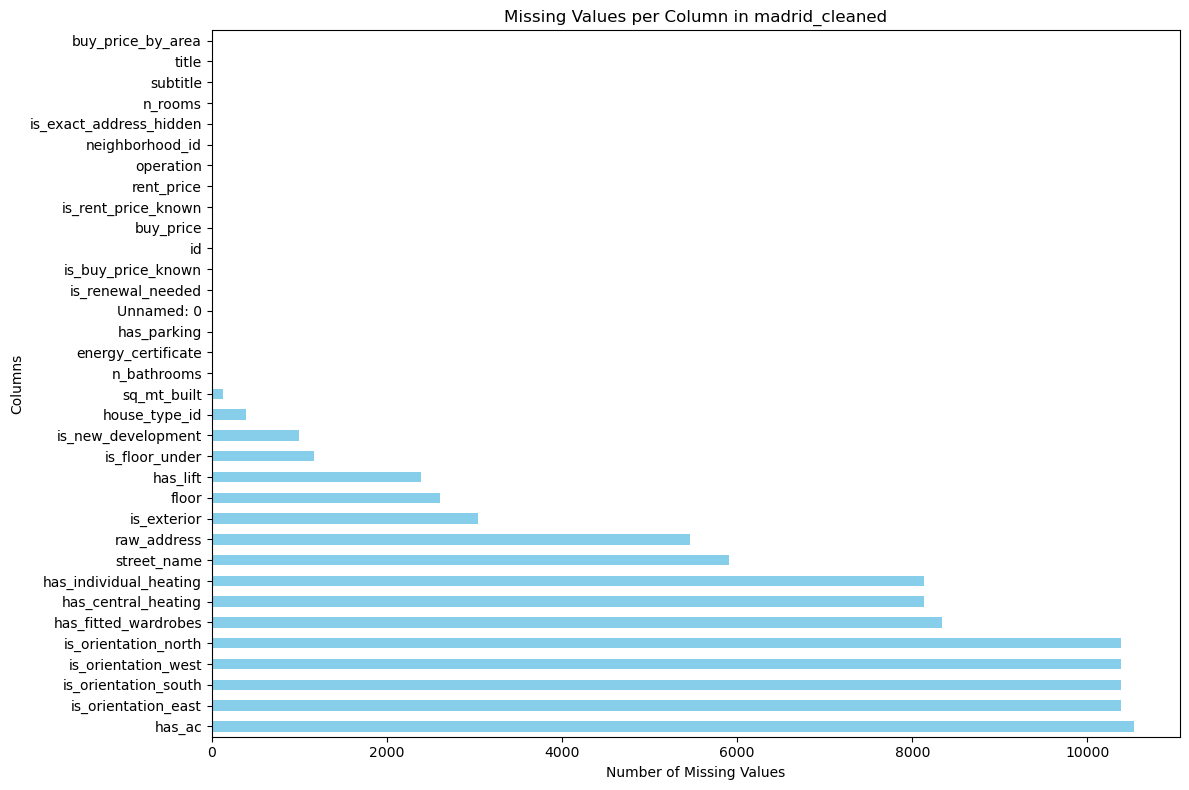

In [19]:
# Calculate missing values for each column
missing_values = madrid_cleaned.isnull().sum()

# Plot
plt.figure(figsize=(12, 8))
missing_values.sort_values(ascending=False).plot(kind='barh', color='skyblue')
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.title('Missing Values per Column in madrid_cleaned')
plt.tight_layout()
plt.show()

In [20]:
# Drop the 'raw_address' column
madrid_cleaned = madrid_cleaned.drop(columns=['raw_address'])
madrid_cleaned = madrid_cleaned.drop(columns=['floor'])



# Verify the column has been dropped
print(madrid_cleaned.columns)

Index(['Unnamed: 0', 'id', 'title', 'subtitle', 'sq_mt_built', 'n_rooms',
       'n_bathrooms', 'is_exact_address_hidden', 'street_name',
       'is_floor_under', 'neighborhood_id', 'operation', 'rent_price',
       'is_rent_price_known', 'buy_price', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'has_central_heating', 'has_individual_heating',
       'has_ac', 'has_fitted_wardrobes', 'has_lift', 'is_exterior',
       'energy_certificate', 'has_parking', 'is_orientation_north',
       'is_orientation_west', 'is_orientation_south', 'is_orientation_east'],
      dtype='object')


In [21]:
# Numeric column imputation
# Use median for sq_mt_built
madrid_cleaned['sq_mt_built'].fillna(madrid_cleaned['sq_mt_built'].median(), inplace=True)


In [22]:
# Categorical/Boolean column imputation
# Use mode for house_type_id and other similar columns
# The [0] indexing is to extract the mode value from the resulting Series
madrid_cleaned['house_type_id'].fillna(madrid_cleaned['house_type_id'].mode()[0], inplace=True)
madrid_cleaned['is_new_development'].fillna(madrid_cleaned['is_new_development'].mode()[0], inplace=True)
madrid_cleaned['has_central_heating'].fillna(madrid_cleaned['has_central_heating'].mode()[0], inplace=True)


In [85]:
madrid_cleaned.isnull().sum()

Unnamed: 0                     0
id                             0
title                          0
subtitle                       0
sq_mt_built                    0
n_rooms                        0
n_bathrooms                   16
is_exact_address_hidden        0
street_name                 5905
is_floor_under              1170
neighborhood_id                0
operation                      0
rent_price                     0
is_rent_price_known            0
buy_price                      0
buy_price_by_area              0
is_buy_price_known             0
house_type_id                  0
is_renewal_needed              0
is_new_development             0
has_central_heating            0
has_individual_heating      8134
has_ac                     10531
has_fitted_wardrobes        8343
has_lift                    2386
is_exterior                 3043
energy_certificate             0
has_parking                    0
is_orientation_north       10384
is_orientation_west        10384
is_orienta

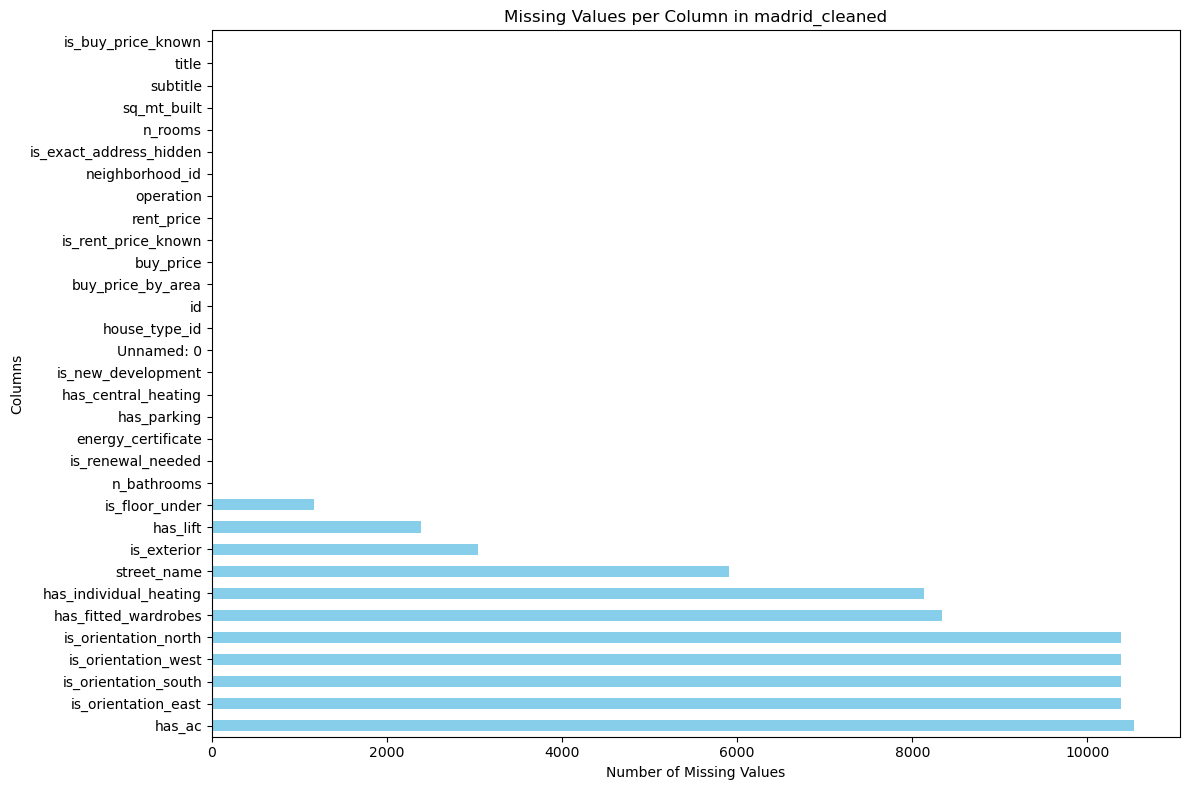

In [23]:
# Calculate missing values for each column
missing_values = madrid_cleaned.isnull().sum()

# Plot
plt.figure(figsize=(12, 8))
missing_values.sort_values(ascending=False).plot(kind='barh', color='skyblue')
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.title('Missing Values per Column in madrid_cleaned')
plt.tight_layout()
plt.show()

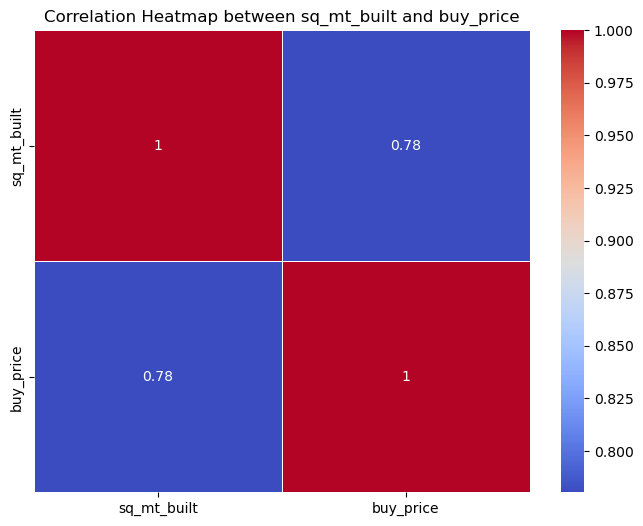

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose the two columns for correlation analysis
column1 = 'sq_mt_built'
column2 = 'buy_price'

# Create a DataFrame containing only the selected columns
selected_columns = madrid_cleaned[[column1, column2]]

# Calculate the correlation matrix
correlation_matrix = selected_columns.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title(f'Correlation Heatmap between {column1} and {column2}')
plt.show()


In [ ]:
#the heatmap shows a positive correlation between the size of houses (sq_mt_built) and their purchase prices (buy_price), 
#indicating that larger houses tend to have higher purchase prices.
#And as expected the correlation of the sq_mt_built is a 1, which is a perfect correlation with itself.

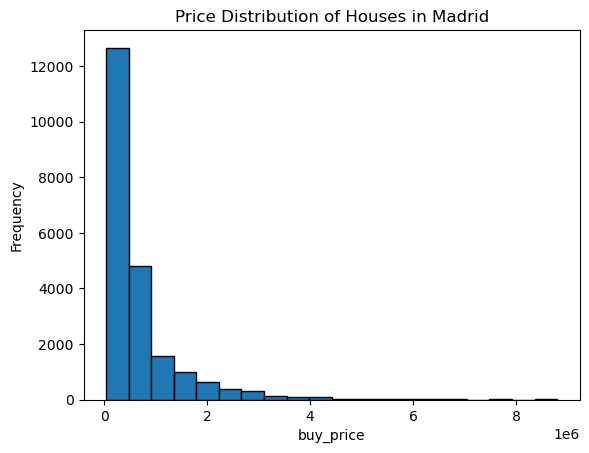

In [27]:
plt.hist(madrid_cleaned['buy_price'], bins=20, edgecolor='k')
plt.xlabel('buy_price')
plt.ylabel('Frequency')
plt.title('Price Distribution of Houses in Madrid')
plt.show()

In [ ]:
#The shape of the histogram suggests the skewness of the price distribution is skewed to the left (negatively skewed),
# meaning that there are relatively more houses with lower prices and a few with very high prices.

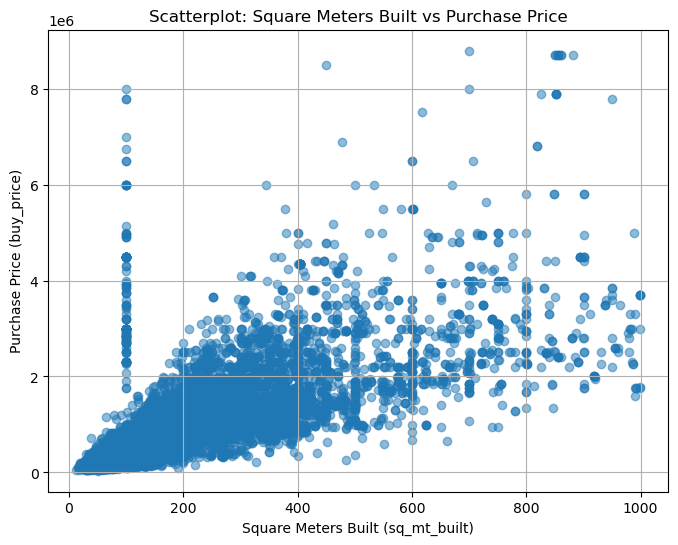

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(madrid_cleaned['sq_mt_built'], madrid_cleaned['buy_price'], alpha=0.5)
plt.xlabel('Square Meters Built (sq_mt_built)')
plt.ylabel('Purchase Price (buy_price)')
plt.title('Scatterplot: Square Meters Built vs Purchase Price')
plt.grid(True)
plt.show()

In [ ]:
#As you move from left to right on the x-axis (increasing square meters built), you generally see an upward trend in 
#purchase prices on the y-axis. But while there is a positive correlation, the scatterplot also shows that there is some 
#variability in purchase prices for houses with similar square meters built. In other words, not all larger houses have 
#extremely high prices, and not all smaller houses have extremely low prices. There are houses with similar sizes but 
#different prices.

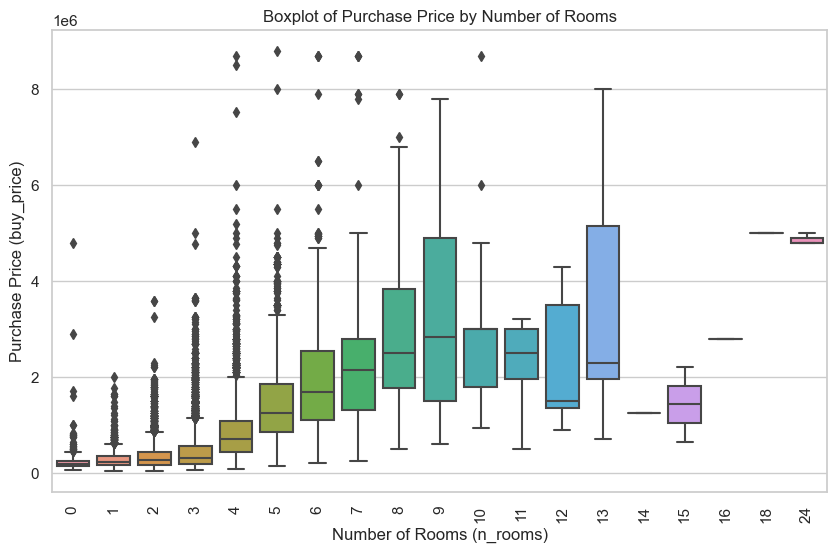

In [29]:
sns.set(style="whitegrid")

# Create a boxplot for "buy_price" by "n_rooms"
plt.figure(figsize=(10, 6))
sns.boxplot(x="n_rooms", y="buy_price", data=madrid_cleaned)
plt.xlabel("Number of Rooms (n_rooms)")
plt.ylabel("Purchase Price (buy_price)")
plt.title("Boxplot of Purchase Price by Number of Rooms")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

In [ ]:
#The x-axis of the boxplot represents the number of rooms in the houses, which is a categorical variable. Each box 
#corresponds to a different number of rooms. The y-axis represents the purchase price of houses, which is a continuous 
#variable. The y-axis scale indicates the range of purchase prices. The boxplot is divided into several boxes, each 
#associated with a specific number of rooms. For example, you have boxes for houses with 1 room, 2 rooms, 3 rooms, and so on. 
#Each box represents the interquartile range (IQR) of purchase prices for houses with a particular number of rooms. The 
#lower and upper edges of the box mark the first quartile (Q1) and third quartile (Q3), respectively. The lines extending 
#from the boxes (whiskers) represent the range of data within 1.5 times the IQR. Any data points beyond the whiskers are 
#considered outliers. For houses with 1 room, the boxplot shows a relatively wide spread of purchase prices, with some 
#outliers on the higher end. Houses with 2 rooms also exhibit a wide range of purchase prices, with a few outliers on both 
#ends. As the number of rooms increases (e.g., 3, 4, or more rooms), the median purchase price tends to rise, indicating that 
#houses with more rooms generally have higher prices.